Ask: Business Problem

Business Task: The objective is to identify how annual members and casual riders use Cyclistic bike-share services differently. This analysis will help in developing marketing strategies to convert casual riders into annual members.

Stakeholders:

Cyclistic marketing team (responsible for the marketing campaigns)
Cyclistic executive team (approves the strategies)
Deliverable: Clear insights into the differences between casual riders and annual members to provide actionable recommendations for converting casual riders into annual members.

Prepare: Data Preparation
We will use the publicly available Cyclistic trip data (Divvy bike-share) from 2019 and early 2020. This data contains information about bike trips, including start and end times, station locations, rider type, and more.

Data Source: Cyclistic bike-share data (fictional dataset for analysis purposes).
Data Period: 2019 (Q2, Q3, Q4) and 2020 (Q1).
Data Credibility: The dataset is anonymous and does not contain personal information. The primary variables include:

ride_id: Unique identifier for each ride.
started_at, ended_at: Timestamps for when each ride started and ended.
start_station_name, end_station_name: Stations where the ride began and ended.
member_casual: Indicates whether the rider is a casual rider or an annual member.

Process: Data Cleaning and Transformation

Step 1: Collect data

In [1]:
# Load necessary libraries
library(tidyverse)  # data wrangling
library(lubridate)  # handle date and time
library(ggplot2)    # visualization

# Load the datasets
q2_2019 <- read_csv("/kaggle/input/cyclistic-exercise-full-year-analysis-2019-2020/Divvy_Trips_2019_Q2/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("/kaggle/input/cyclistic-exercise-full-year-analysis-2019-2020/Divvy_Trips_2019_Q3/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("/kaggle/input/cyclistic-exercise-full-year-analysis-2019-2020/Divvy_Trips_2019_Q4/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("/kaggle/input/cyclistic-exercise-full-year-analysis-2019-2020/Divvy_Trips_2020_Q1/Divvy_Trips_2020_Q1.csv")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 1108163 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1640718 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 704054 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 426887 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Step 2: Wrangle data and combine into a single file

Compare and rename columns to make the datasets consistent.
Bind the datasets together.

In [2]:
#STEP 2: Wrangle Data and Combine into a Single File

# Compare column names of each file
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

# Rename columns to match q1_2020 for consistency
q4_2019 <- rename(q4_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid, 
                  started_at = start_time,  
                  ended_at = end_time,  
                  start_station_name = from_station_name, 
                  start_station_id = from_station_id, 
                  end_station_name = to_station_name, 
                  end_station_id = to_station_id, 
                  member_casual = usertype)

q3_2019 <- rename(q3_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid, 
                  started_at = start_time,  
                  ended_at = end_time,  
                  start_station_name = from_station_name, 
                  start_station_id = from_station_id, 
                  end_station_name = to_station_name, 
                  end_station_id = to_station_id, 
                  member_casual = usertype)

q2_2019 <- rename(q2_2019,
                  ride_id = "01 - Rental Details Rental ID",
                  rideable_type = "01 - Rental Details Bike ID", 
                  started_at = "01 - Rental Details Local Start Time",  
                  ended_at = "01 - Rental Details Local End Time",  
                  start_station_name = "03 - Rental Start Station Name", 
                  start_station_id = "03 - Rental Start Station ID", 
                  end_station_name = "02 - Rental End Station Name", 
                  end_station_id = "02 - Rental End Station ID", 
                  member_casual = "User Type")

# Converting Data Types
q4_2019 <- mutate(q4_2019, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
q3_2019 <- mutate(q3_2019, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
q2_2019 <- mutate(q2_2019, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))

# Combine the datasets into one
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

# Remove unnecessary columns
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "01 - Rental Details Duration In Seconds Uncapped", "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))



[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [3]:
#STEP 3: Clean Up and Add Data to Prepare for Analysis:

# Reassign labels to make them consistent
all_trips <- all_trips %>% 
  mutate(member_casual = recode(member_casual,
                                "Subscriber" = "member",
                                "Customer" = "casual"))

# Add columns for date, month, day, year, and day of the week
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a column for ride length
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)

# Convert ride_length to numeric
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

# Remove rows where the start station name is "HQ QR" or ride_length is negative
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length < 0), ]



Analyze: Data Analysis
Descriptive Analysis

Calculate the average, median, max, and min ride lengths for both casual riders and annual members.

In [4]:
#STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips_v2$ride_length)  # straight average (total ride length / rides)
median(all_trips_v2$ride_length)  # midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length)  # longest ride
min(all_trips_v2$ride_length)  # shortest ride

# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, 
                                    levels=c("Sunday", "Monday", "Tuesday", 
                                             "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

#Analyze Ridership Data by Type and Weekday
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%  # creates weekday field using wday()
  group_by(member_casual, weekday) %>%  # groups by usertype and weekday
  summarise(number_of_rides = n(),  # calculates the number of rides and average duration 
            average_duration = mean(ride_length)) %>%  # calculates the average duration
  arrange(member_casual, weekday)  # sorts the data


[1] 1479.139

[1] 712

[1] 9387024

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,3552.7502
member,850.0662


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1546
member,589


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,3773.8351
member,Friday,824.5305
casual,Monday,3372.2869
member,Monday,842.5726
casual,Saturday,3331.9138
member,Saturday,968.9337
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Thursday,3682.9847


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Monday,3372.2869
member,Monday,842.5726
casual,Tuesday,3596.3599
member,Tuesday,826.1427
casual,Wednesday,3718.6619
member,Wednesday,823.9996
casual,Thursday,3682.9847


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,181293,3581.4054
casual,Mon,103296,3372.2869
casual,Tue,90510,3596.3599
casual,Wed,92457,3718.6619
casual,Thu,102679,3682.9847
casual,Fri,122404,3773.8351
casual,Sat,209543,3331.9138
member,Sun,267965,919.9746
member,Mon,472196,842.5726


Share: Data Visualization
We visualize the number of rides and average ride duration for each rider type using ggplot2:

Number of Rides by Rider Type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


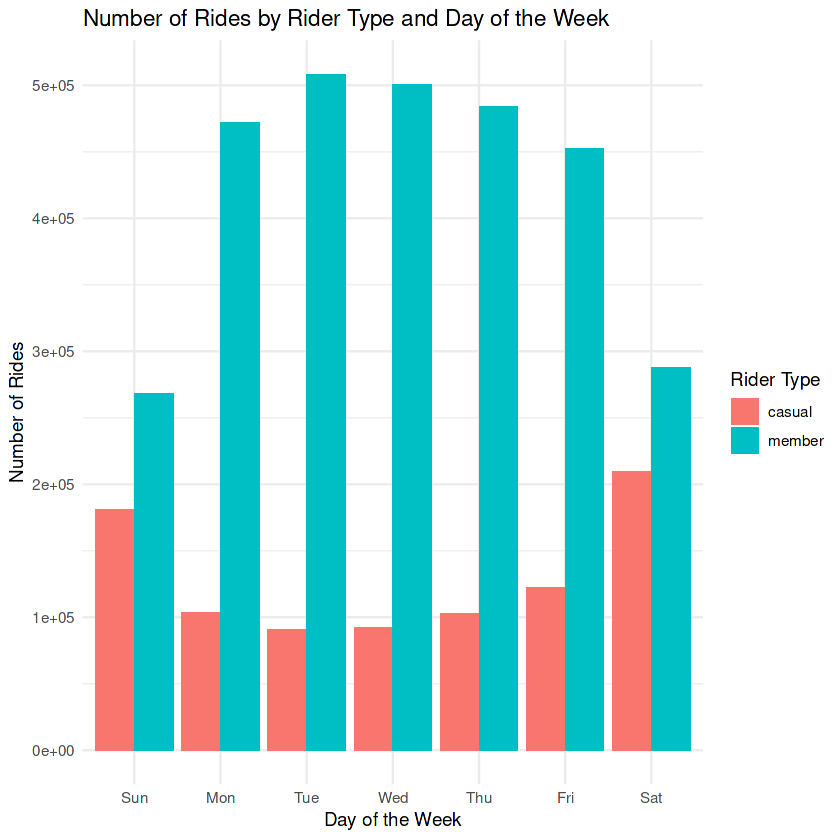

In [5]:
#Visualization: Number of Rides by Rider Type
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by Rider Type and Day of the Week",
       x = "Day of the Week",
       y = "Number of Rides",
       fill = "Rider Type") +
  theme_minimal()

Average Ride Duration by Rider Type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


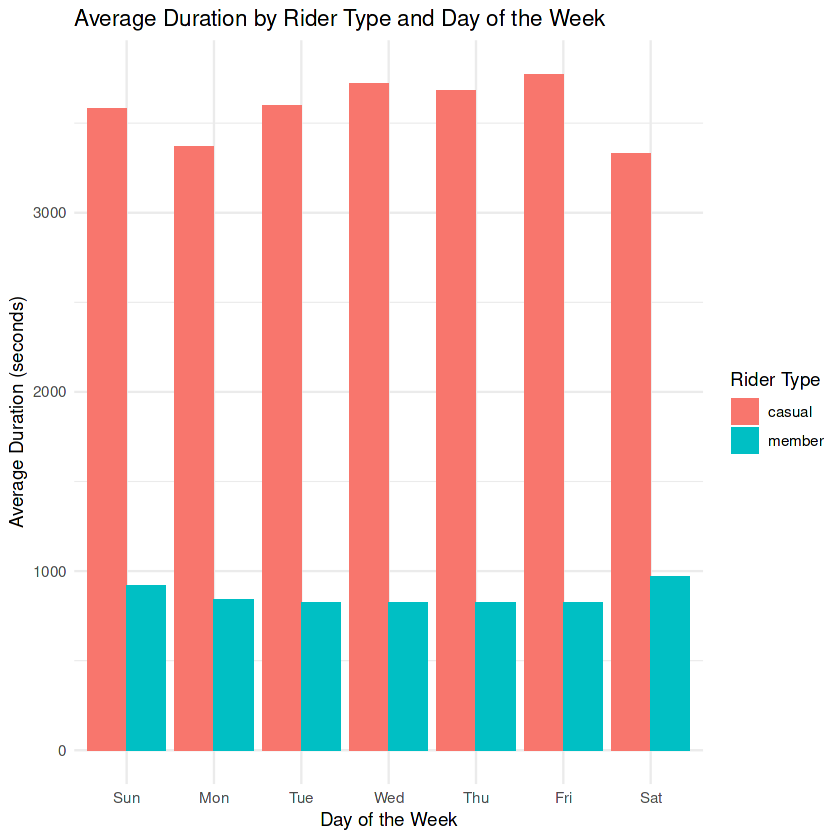

In [6]:
#Visualization: Average Duration by Rider Type
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Duration by Rider Type and Day of the Week",
       x = "Day of the Week",
       y = "Average Duration (seconds)",
       fill = "Rider Type") +
  theme_minimal()

#Step 5: Export Summary File for Further Analysis

In [7]:
counts <- all_trips_v2 %>%
  group_by(member_casual, day_of_week) %>%
  summarise(
    average_ride_length = mean(ride_length),
    count_of_rides = n()
  )


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


Share:

Key Findings:

Longer Ride Lengths for Casual Riders.

Higher Activity for Casual Riders on Weekends.

Consistent Ride Patterns for Members.

Act:

Recommendations

Recommendation 1: Cyclistic should offer weekend promotions targeting casual riders. Casual riders tend to use bikes more on weekends, so promotions during these periods could drive increased ride members.

Recommendation 2: Provide membership discount offers based on casual riders' frequent routes. Highlight convenience and cost-saving benefits of becoming an member.

Recommendation 3: Launch social media campaigns targeting lifestyle benefits such as fitness, cost savings, and environmental benefits, encouraging casual riders to become members.

